# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [205]:
tsa = pd.read_csv('~/Downloads/ujian-modul-2/tsa_claims_ujian.csv')

In [206]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [207]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [208]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [209]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [210]:
liskosong = []
for i in tsa.columns:
    liskosong.append([i, 
                      tsa[i].dtypes, 
                      tsa[i].isnull().sum(), 
                      round(((tsa[i].isnull().sum())/(len(tsa))*100),2), 
                      tsa[i].nunique(),
                      tsa[i].drop_duplicates().sample(2).values])

pd.DataFrame(liskosong, columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2004051251248, 2006112216112]"
1,Date Received,object,70,0.14,3522,"[28-Feb-08, 20-Feb-14]"
2,Incident Date,object,570,1.12,10788,"[10/19/2011 16:15, 23-Jan-14]"
3,Airport Code,object,2052,4.02,405,"[EKO, ERI]"
4,Airport Name,object,2052,4.02,419,"[Evansville Regional Airport, Salisbury/Wicomi..."
5,Airline Name,object,8555,16.75,243,"[Montair Aviation Inc , Air Berlin]"
6,Claim Type,object,1960,3.84,8,"[Personal Injury, nan]"
7,Claim Site,object,190,0.37,6,"[Motor Vehicle, Other]"
8,Item,object,1012,1.98,1854,[Cameras; Clothing; Cosmetics & Grooming; Jewe...
9,Claim Amount,object,992,1.94,13248,"[$4;525.00 , $33.00 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [211]:
tsa.replace('-',np.nan, inplace=True)
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,22-Oct-15,19-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN


Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [212]:
salahtanggal = []
for x in range (0, len(tsa['Incident Date'])):
    try :
        pd.to_datetime(tsa['Incident Date'][x])
    except :
        salahtanggal.append(x)
tsa.iloc[salahtanggal]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,24-Jan-05,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,23-Feb-05,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,23-Mar-05,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,29-Mar-05,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,30-Mar-05,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,12-Apr-05,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,17-May-05,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,8-Jul-05,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,1-Aug-05,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,8-Dec-05,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [213]:
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'])
for i in salahtanggal:
    tsa['Incident Date'][i] = tsa['Incident Date'][i].replace(tsa['Incident Date'][i][7:11], str(tsa['Date Received'][i].year))
tsa['Incident Date'] =pd.to_datetime(tsa['Incident Date'])

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [214]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [215]:
tsa.iloc[salahtanggal]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [216]:
tsa['Day Differences'] = tsa['Date Received'] - tsa['Incident Date']
tsa['Day Differences'] = tsa['Day Differences'].apply(lambda x : x.days)
tsa['Day Differences']

0       -333.0
1          4.0
2         42.0
3         40.0
4         10.0
         ...  
51061      3.0
51062      0.0
51063     63.0
51064     35.0
51065      2.0
Name: Day Differences, Length: 51066, dtype: float64

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

Text(0.5, 1.0, 'Day Differences Distribution')

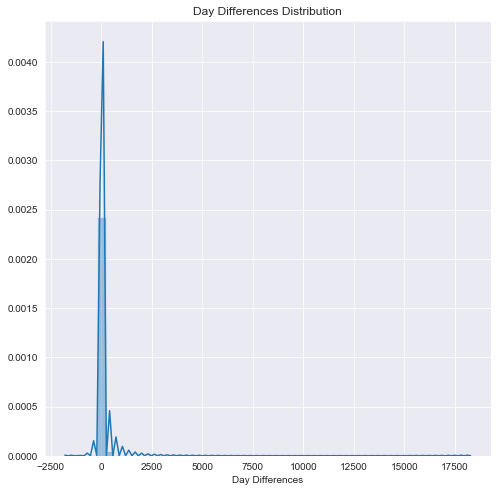

In [217]:
plt.figure(figsize=(8,8))
sns.distplot(tsa['Day Differences'].dropna())
plt.title('Day Differences Distribution')

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

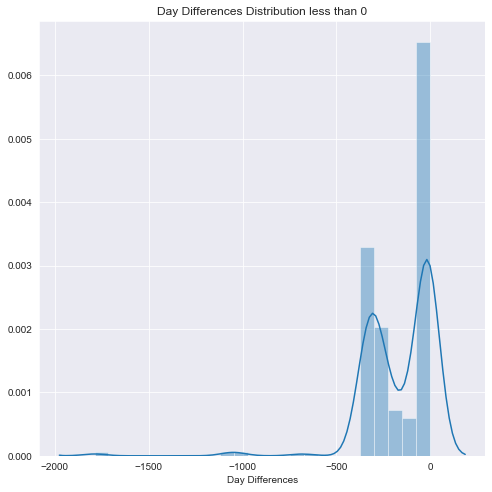

In [218]:
plt.figure(figsize=(8,8))
sns.distplot(tsa[tsa['Day Differences'] < 0]['Day Differences'].dropna())
plt.title('Day Differences Distribution less than 0')

Text(0.5, 1.0, 'Day Differences Distribution over than 1000')

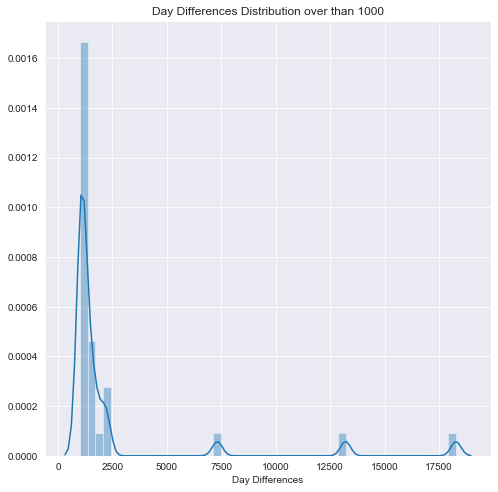

In [219]:
plt.figure(figsize=(8,8))
sns.distplot(tsa[tsa['Day Differences'] > 1000]['Day Differences'].dropna())
plt.title('Day Differences Distribution over than 1000')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

## Answer
Untuk kasus dengan perbedaan hari kurang dari nol, bisa saja kasusnya sudah ditemukan terlebih dahulu oleh pihak yang berwenang/orang lain.

Sementara untuk kasus yang lebih dari 1000 hari, dikarenakan perlu penilaian dari pihak TSA apakah klaim tersebut valid untuk menghindari hal-hal yang tidak diinginkan, cepat atau lambatnya suatu klaim dapat dinilai jg bisa dipengaruhi oleh bukti-bukti yang bisa dibawa oleh pihak yang mengajukan klaim.

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [221]:
tsa['Claim Amount'] = tsa['Claim Amount'].str.replace('$', '')
tsa['Claim Amount'] = tsa['Claim Amount'].str.replace(';', '')
tsa['Close Amount'] = tsa['Close Amount'].str.replace('$', '')
tsa['Close Amount'] = tsa['Close Amount'].str.replace(';', '')

In [222]:
tsa['Claim Amount'] = tsa['Claim Amount'].astype('float')

In [223]:
tsa['Close Amount'] = tsa['Close Amount'].astype('float')

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [225]:
tsa['Amount Differences'] = tsa['Claim Amount'] - tsa['Close Amount']

In [226]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Differences       50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


In [227]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

Text(0.5, 1.0, 'Amount Differences Distribution')

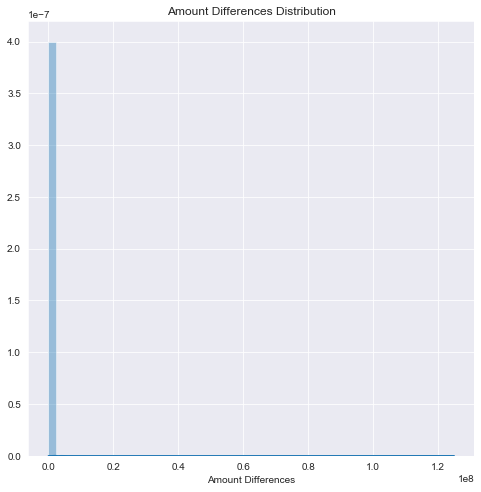

In [228]:
plt.figure(figsize=(8,8))
sns.distplot(tsa['Amount Differences'].dropna())
plt.title('Amount Differences Distribution')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [233]:
q3 = tsa['Amount Differences'].describe()['75%']
q1 = tsa['Amount Differences'].describe()['25%']
iqr = q3-q1
lower_iqr = q1 - (1.5*iqr)
upper_iqr = q3 + (1.5*iqr)

In [235]:
tsa[(tsa['Amount Differences']>upper_iqr) | (tsa['Amount Differences']<lower_iqr)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,2300.00


In [236]:
tsa[(tsa['Amount Differences']>upper_iqr) | (tsa['Amount Differences']<lower_iqr)]['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [237]:
tsa[(tsa['Amount Differences']>upper_iqr) | (tsa['Amount Differences']<lower_iqr)]['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

In [278]:
tsa.groupby('Status').mean()

,Claim Amount,Close Amount,Day Differences,Amount Differences
Status,,,,
Approve in Full,171.034319,NaN,36.902054,NaN
Approved,151.507562,150.794870,43.341274,0.823646
Canceled,3487.636602,81.486640,49.591954,3580.431637
Claim entered,NaN,NaN,NaN,NaN
Closed as a contractor claim,1455.820000,0.000000,67.938080,1486.613639
Denied,9925.503704,24.276625,43.392889,10085.782568
Deny,0.000000,NaN,35.764051,NaN
In litigation,872603.545600,NaN,221.958333,NaN
In review,4024.053333,NaN,18.000000,NaN


In [280]:
tsa.groupby('Status').count()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Close Amount,Disposition,Day Differences,Amount Differences
Status,,,,,,,,,,,,,,
Approve in Full,3165,3165,3165,3165,3165,2886,3161,3164,2918,3165,0,0,3165,0
Approved,8724,8714,8655,8416,8416,6249,8297,8707,8566,8664,8688,8724,8647,8633
Canceled,1708,1679,1568,1386,1386,1070,1423,1655,1599,1436,1018,5,1566,898
Claim entered,2,0,2,0,0,0,0,0,1,0,0,0,0,0
Closed as a contractor claim,326,326,323,317,317,248,320,325,258,314,316,0,323,305
Denied,17134,17125,17051,16814,16814,14445,16615,17089,16656,17055,16794,17125,17043,16719
Deny,7010,7010,7010,7010,7010,6682,6999,6998,6643,7010,0,0,7010,0
In litigation,25,25,24,25,25,18,25,24,11,25,0,16,24,0
In review,3,3,3,3,3,2,3,2,3,3,0,1,3,0


Melihat data di atas, bisa ditarik kesimpulan bahwa rata-rata Amount Differences menjadi besar diakibatkan banyaknya klaim yang tidak diterima, dengan jumlah klaim yang tidak diterima sedikit lebih besar dibandingkan jumlah klaim yang diterima

Nilai Amount Differences pada klaim yang ditolak mencapai 30x nilai Amount Differences klaim yang Settled dan 10000x jumlah klaim yang diterima

Nilai Amount Differences dari klaim yang ditolak inilah yang menaikkan nilai rata-rata Amount Differences keseluruhan

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

## Answer
1.

In [282]:
tsa.groupby('Airport Code').count().sort_values(by='Claim Number', ascending=False)

,Claim Number,Date Received,Incident Date,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
Airport Code,,,,,,,,,,,,,,
LAX,2379,2377,2364,2379,1902,2279,2373,2305,2187,2223,1613,1586,2362,1602
JFK,2286,2285,2282,2286,2019,2233,2281,2174,2025,2050,1258,1250,2281,1253
EWR,1747,1747,1737,1747,1500,1676,1736,1681,1616,1638,1178,1177,1737,1173
ORD,1712,1712,1704,1712,1439,1652,1706,1650,1593,1620,1209,1199,1704,1201
MCO,1633,1630,1631,1633,1408,1592,1624,1561,1531,1546,970,956,1628,967
MIA,1613,1612,1607,1613,1356,1548,1607,1548,1437,1462,1028,1023,1606,1023
ATL,1525,1523,1519,1525,1331,1490,1524,1455,1360,1384,917,917,1517,912
SEA,1330,1329,1323,1330,1088,1286,1330,1294,1230,1248,920,905,1323,913
LAS,1278,1278,1272,1278,1086,1242,1273,1231,1211,1230,873,866,1272,868


In [283]:
tsa.groupby('Airline Name').count().sort_values(by='Claim Number', ascending=False)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
Airline Name,,,,,,,,,,,,,,
American Airlines,4377,4369,4361,4293,4293,4211,4368,4244,4226,4285,3891,3796,4353,3881
Delta Air Lines,4371,4370,4355,4287,4287,4210,4364,4228,4212,4281,3845,3752,4354,3830
UAL,3507,3506,3498,3447,3447,3385,3499,3387,3394,3444,3061,2923,3497,3049
Southwest Airlines,3258,3254,3247,3220,3220,3169,3250,3113,3132,3175,2750,2698,3243,2739
Continental Airlines,2363,2363,2356,2319,2319,2285,2356,2312,2328,2363,2261,2217,2356,2257
USAir,2359,2357,2349,2298,2298,2270,2352,2299,2304,2336,2130,2091,2347,2123
Northwest Airlines,2311,2311,2303,2239,2239,2222,2305,2261,2273,2311,2214,2151,2303,2203
Delta Air Lines,2074,2074,2074,2070,2070,2070,2074,1930,1672,1672,0,0,2074,0
Southwest Airlines,1899,1899,1899,1899,1899,1896,1896,1757,1519,1519,0,0,1899,0


Apakah ada perbedaan antara bandara/maskapai terhadap jumlah dan jenis klaim? Merujuk data di atas jelas ada, akan tetapi untuk mengetahui secara pasti perlu data tambahan seperti frekuensi penerbangan maskapai tersebut maupun frekuensi pesawat yang singgah di bandara tersebut, karena bisa saja bandara maskapai tidak mempengaruhi dan perbedaan nilai terjadi karena jam terbang yang berbeda

Hal yang unik adalah adanya maskapai-maskapai dengan klaim yang cukup tinggi tetapi jumlah klaim yang dibayarkan 0, seperti Delta Air Lines maupun Southwest Airlines, apakah itu kebijakan mereka, atau mereka tidak mau membuka datanya, saya tidak tau pasti.

Adanya NaN pada tipe klaim bisa saja karena kasusnya unik sehingga TSA tidak dapat mengidentifikasi atau pemohon klaim yang tidak dapat mengidentifikasi tipe klaimnya

2.

In [284]:
tsa.groupby('Disposition').count()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Day Differences,Amount Differences
Disposition,,,,,,,,,,,,,,
Approve in Full,8727,8717,8658,8419,8419,6252,8300,8710,8569,8667,8727,8689,8650,8634
Deny,17147,17138,17063,16825,16825,14454,16628,17100,16662,17067,17147,16793,17055,16718
Settle,6972,6957,6917,6641,6641,5084,6458,6965,6885,6917,6972,6972,6902,6917


In [285]:
tsa.groupby('Disposition').mean()

,Claim Amount,Close Amount,Day Differences,Amount Differences
Disposition,,,,
Approve in Full,153.307817,150.782694,43.427514,0.823551
Deny,11036.989827,24.278071,43.483143,10086.344517
Settle,574.509467,235.314091,41.631411,338.553175


Seperti halnya status, Disposition terutama mempengaruhi nilai Amount Differences, dan rasio nilainya juga mirip-mirip dimana Amount Differences Deny hampir 30x Settle dan sampir 10000 Approve in full

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

In [288]:
tsa[(tsa['Amount Differences']<upper_iqr) 
    | (tsa['Amount Differences']>lower_iqr)].dropna().to_csv(r'~/Downloads/tsa_claims_dashboard_ujian.csv',index=False,header=True)

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [32]:
np.random.seed(101)

Export the data to your SQL database, and try to connect the database to the dashboard